In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score , silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score , adjusted_mutual_info_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [5]:
df.shape

(7043, 21)

In [6]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [7]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.drop_duplicates(subset=['customerID'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df=df.drop(['Dependents'], axis=1)

In [11]:
df_new = df.copy()
df_new.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [12]:
df_new.shape

(7043, 20)

In [13]:
def getGender(str):
    if str=="Male":
        return 1
    else:
        return 2
    
def getPartner(str):
    if str=="Yes":
        return 1
    else:
        return 2
    
# def getDependents(str):
#     if str=="Yes":
#         return 1
#     else:
#         return 2
def getPhoneService(str):
    if str=="Yes":
        return 1
    else:
        return 2
def getMultipleLines(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getInternetService(str):
    if str=="DSL":
        return 1
    elif str == "Fiber optic":
        return 2
    else:
        return 3
def getOnlineSecurity(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getOnlineBackup(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getDeviceProtection(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getTechSupport(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getStreamingTV(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getStreamingMovies(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getContract(str):
    if str=="Month-to-month":
        return 1
    elif str == "Two year":
        return 2
    else:
        return 3
def getPaperlessBilling(str):
    if str=="Yes":
        return 1
    else:
        return 2
def getPaymentMethod(str):
    if str=="Electronic check":
        return 1
    elif str == "Mailed check":
        return 2
    elif str == "Bank transfer (automatic)":
        return 3
    else:
         return 4
    
df_new["gender"]= df_new["gender"].apply(getGender)
df_new["Partner"]= df_new["Partner"].apply(getPartner)
# df["Dependents"]= df["Dependents"].apply(getDependents)
df_new["PhoneService"]= df_new["PhoneService"].apply(getPhoneService)
df_new["MultipleLines"]= df_new["MultipleLines"].apply(getMultipleLines)
df_new["InternetService"]= df_new["InternetService"].apply(getInternetService)
df_new["OnlineSecurity"] = df_new["OnlineSecurity"].apply(getOnlineSecurity)
df_new["OnlineBackup"]= df_new["OnlineBackup"].apply(getOnlineBackup)
df_new["DeviceProtection"]= df_new["DeviceProtection"].apply(getDeviceProtection)
df_new["TechSupport"]= df_new["TechSupport"].apply(getOnlineBackup)
df_new["StreamingTV"]= df_new["StreamingTV"].apply(getStreamingTV)
df_new["StreamingMovies"]= df_new["StreamingMovies"].apply(getStreamingMovies)
df_new["Contract"]= df_new["Contract"].apply(getContract)
df_new["PaperlessBilling"]= df_new["PaperlessBilling"].apply(getPaperlessBilling)
df_new["PaymentMethod"] = df_new["PaymentMethod"].apply(getPaymentMethod)


In [14]:
# df['SeniorCitizen']=df['SeniorCitizen'].replace(to_replace=1,value=2)
df_new['SeniorCitizen']=df_new['SeniorCitizen'].replace(to_replace=0,value=2)

In [15]:
df_new.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.495244,1.837853,1.516967,32.371149,1.096834,1.674996,1.872923,1.930001,1.871788,1.872781,1.926452,1.832316,1.828766,1.658952,1.407781,2.315633,64.761692
std,0.500013,0.368612,0.499748,24.559481,0.295752,0.642730,0.737796,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.801943,0.491457,1.148907,30.090047
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.250000
25%,1.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.500000
50%,1.000000,2.000000,2.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,70.350000
75%,2.000000,2.000000,2.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,89.850000
max,2.000000,2.000000,2.000000,72.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,118.750000


In [16]:
df_new.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,2,1,1,2,3,1,2,1,2,2,2,2,1,1,1,29.85,29.85,No
1,5575-GNVDE,1,2,2,34,1,2,1,1,2,1,2,2,2,3,2,2,56.95,1889.5,No
2,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
3,7795-CFOCW,1,2,2,45,2,3,1,1,2,1,1,2,2,3,2,3,42.30,1840.75,No
4,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,2,2,2,12,1,1,2,1,2,2,2,2,2,1,1,1,78.95,927.35,Yes
96,9803-FTJCG,1,2,1,71,1,1,1,1,1,2,1,2,2,3,1,4,66.85,4748.7,No
97,0278-YXOOG,1,2,2,5,1,2,3,3,3,3,3,3,3,1,2,2,21.05,113.85,Yes
98,3212-KXOCR,1,2,2,52,1,2,3,3,3,3,3,3,3,2,2,3,21.00,1107.2,No


In [17]:
df_new['TotalCharges'] = df_new['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [18]:
sum(df_new.isnull().sum())

11

In [19]:
count_nan = df_new['TotalCharges'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 11


In [20]:
df_new.fillna(df_new.mean(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_7476\3663506886.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.fillna(df_new.mean(), inplace=True)


In [21]:
sum(df_new.isnull().sum())

0

In [22]:
result = df_new.dtypes
result

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
df_New1 = df_new.copy()

In [24]:
df_New1

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,2,1,1,2,3,1,2,1,2,2,2,2,1,1,1,29.85,29.85,No
1,5575-GNVDE,1,2,2,34,1,2,1,1,2,1,2,2,2,3,2,2,56.95,1889.50,No
2,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
3,7795-CFOCW,1,2,2,45,2,3,1,1,2,1,1,2,2,3,2,3,42.30,1840.75,No
4,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,2,1,24,1,1,1,1,2,1,1,1,1,3,1,2,84.80,1990.50,No
7039,2234-XADUH,2,2,1,72,1,1,2,2,1,1,2,1,1,3,1,4,103.20,7362.90,No
7040,4801-JZAZL,2,2,1,11,2,3,1,1,2,2,2,2,2,1,1,1,29.60,346.45,No
7041,8361-LTMKD,1,1,1,4,1,1,2,2,2,2,2,2,2,1,1,2,74.40,306.60,Yes


In [25]:
df1=df_New1.loc[df_new['Churn'].str.contains('es')]

In [26]:
df1

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
4,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
5,9305-CDSKC,2,2,2,8,1,1,2,2,2,1,2,1,1,1,1,1,99.65,820.50,Yes
8,7892-POOKP,2,2,1,28,1,1,2,2,2,1,1,1,1,1,1,1,104.80,3046.05,Yes
13,0280-XJGEX,1,2,2,49,1,1,2,2,1,1,2,1,1,1,1,3,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,1,2,2,12,1,2,1,2,2,2,1,1,2,3,1,1,59.80,727.80,Yes
7026,8775-CEBBJ,2,2,2,9,1,2,1,2,2,2,2,2,2,1,1,3,44.20,403.35,Yes
7032,6894-LFHLY,1,1,2,1,1,1,2,2,2,2,2,2,2,1,1,1,75.75,75.75,Yes
7034,0639-TSIQW,2,2,2,67,1,1,2,1,1,1,2,1,2,1,1,4,102.95,6886.25,Yes


In [27]:
df2 = df1.reset_index(drop=True)


In [28]:
df2

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
1,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
2,9305-CDSKC,2,2,2,8,1,1,2,2,2,1,2,1,1,1,1,1,99.65,820.50,Yes
3,7892-POOKP,2,2,1,28,1,1,2,2,2,1,1,1,1,1,1,1,104.80,3046.05,Yes
4,0280-XJGEX,1,2,2,49,1,1,2,2,1,1,2,1,1,1,1,3,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,1,2,2,12,1,2,1,2,2,2,1,1,2,3,1,1,59.80,727.80,Yes
1865,8775-CEBBJ,2,2,2,9,1,2,1,2,2,2,2,2,2,1,1,3,44.20,403.35,Yes
1866,6894-LFHLY,1,1,2,1,1,1,2,2,2,2,2,2,2,1,1,1,75.75,75.75,Yes
1867,0639-TSIQW,2,2,2,67,1,1,2,1,1,1,2,1,2,1,1,4,102.95,6886.25,Yes


In [31]:
df2.shape

(1869, 20)

In [32]:
from sklearn import preprocessing  
def starndadize_data(df):
    '''Starndardize the numerical values in the input data frame
    Args:
       df: data frame that need to standardize
    Returns:
       df: data frame with starndardize numerical variables
    '''
   
    print('Assign the numeric values list in the data frame into num_col')     
    num_col = list(df.select_dtypes(include=np.number).columns)
    
    print('Replace null values with Zero')
    df[num_col] = df[num_col].fillna(0)
   
    print('Starndadize the numerical variables')
    df[num_col] = preprocessing.StandardScaler().fit_transform(df[num_col])
    
    return df 

In [33]:
df6 = starndadize_data(df_new)
df6.head(200)

Assign the numeric values list in the data frame into num_col
Replace null values with Zero
Starndadize the numerical variables


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1.009559,0.439916,-1.034530,-1.277445,3.054010,2.061669,-1.183234,0.099148,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-1.145198,-1.160323,-0.994971,No
1,5575-GNVDE,-0.990532,0.439916,0.966622,0.066327,-0.327438,0.505697,-1.183234,-1.317281,0.173655,-1.182926,0.103860,0.221540,0.225767,1.672366,1.205113,-0.274744,-0.259629,-0.173876,No
2,3668-QPYBK,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,Yes
3,7795-CFOCW,-0.990532,0.439916,0.966622,0.514251,3.054010,2.061669,-1.183234,-1.317281,0.173655,-1.182926,-1.308270,0.221540,0.225767,1.672366,1.205113,0.595711,-0.746535,-0.195400,No
4,9237-HQITU,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2604-IJPDU,1.009559,0.439916,-1.034530,-0.503758,-0.327438,0.505697,0.172250,-1.317281,-1.180777,0.172426,-1.308270,-1.099631,0.225767,-0.821752,-0.829798,-1.145198,1.056514,-0.168511,No
196,9178-JHUVJ,-0.990532,0.439916,-1.034530,-0.340876,-0.327438,-1.050276,1.527734,1.515577,1.528087,1.527778,1.515989,1.542710,1.544241,0.425307,-0.829798,0.595711,-1.351430,-0.748795,No
197,6168-YBYNP,-0.990532,0.439916,0.966622,1.084337,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,-1.308270,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.548406,1.870530,No
198,7255-SSFBC,-0.990532,0.439916,-1.034530,1.613701,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,-1.308270,-1.099631,-1.092706,0.425307,-0.829798,0.595711,1.578319,2.542498,No


In [34]:
df3=df_new.loc[df_new['Churn'].str.contains('es')]

In [35]:
df3.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,Yes
4,9237-HQITU,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,Yes
5,9305-CDSKC,1.009559,0.439916,0.966622,-0.992402,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,0.103860,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.159546,-0.645874,Yes
8,7892-POOKP,1.009559,0.439916,-1.034530,-0.177995,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.308270,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.330711,0.336779,Yes
13,0280-XJGEX,-0.990532,0.439916,0.966622,0.677133,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.103860,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.294151,1.215539,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0259-GBZSH,-0.990532,0.439916,0.966622,-1.236724,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.103860,-1.099631,0.225767,-0.821752,-0.829798,-1.145198,0.694243,-0.928013,Yes
377,9601-BRXPO,1.009559,0.439916,-1.034530,-0.300156,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.308270,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.335696,0.125042,Yes
381,6905-NIQIN,-0.990532,0.439916,0.966622,-1.277445,-0.327438,0.505697,-1.183234,0.099148,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,1.205113,-0.274744,-0.469015,-0.985788,Yes
383,5167-ZFFMM,-0.990532,0.439916,0.966622,-1.277445,-0.327438,-1.050276,0.172250,0.099148,-1.180777,0.172426,0.103860,0.221540,-1.092706,-0.821752,-0.829798,1.466165,0.867069,-0.968038,Yes


In [36]:
df3.reset_index(inplace = True,drop=True)
df3

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,Yes
1,9237-HQITU,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,Yes
2,9305-CDSKC,1.009559,0.439916,0.966622,-0.992402,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.159546,-0.645874,Yes
3,7892-POOKP,1.009559,0.439916,-1.034530,-0.177995,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.30827,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.330711,0.336779,Yes
4,0280-XJGEX,-0.990532,0.439916,0.966622,0.677133,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.294151,1.215539,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,-0.990532,0.439916,0.966622,-0.829521,-0.327438,0.505697,-1.183234,0.099148,0.173655,0.172426,-1.30827,-1.099631,0.225767,1.672366,-0.829798,-1.145198,-0.164907,-0.686804,Yes
1865,8775-CEBBJ,1.009559,0.439916,0.966622,-0.951682,-0.327438,0.505697,-1.183234,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,0.595711,-0.683387,-0.830059,Yes
1866,6894-LFHLY,-0.990532,-2.273159,0.966622,-1.277445,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.365207,-0.974705,Yes
1867,0639-TSIQW,1.009559,0.439916,0.966622,1.410099,-0.327438,-1.050276,0.172250,-1.317281,-1.180777,-1.182926,0.10386,-1.099631,0.225767,-0.821752,-0.829798,1.466165,1.269224,2.032351,Yes


In [37]:
df3.shape

(1869, 20)

# K-Means

In [38]:
drop_vars = ["customerID","Churn"]
df4 = df3.drop(drop_vars, axis=1)
# df7 = df6.drop(["customerID","Churn"],inplace = True,axis = 1)

In [39]:
df4.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399
1,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193
2,1.009559,0.439916,0.966622,-0.992402,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.159546,-0.645874
3,1.009559,0.439916,-1.034530,-0.177995,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.30827,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.330711,0.336779
4,-0.990532,0.439916,0.966622,0.677133,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.294151,1.215539


In [40]:
df4.shape

(1869, 18)

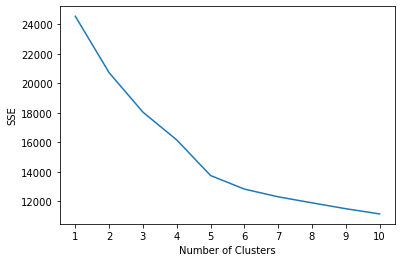

In [41]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df4)
    sse.append(kmeans.inertia_)
    

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=5, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df4)

#view cluster assignments for each observation
kmeans.labels_

# array([1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0]) 

array([3, 3, 3, ..., 4, 0, 4])

In [43]:
#append cluster assingments to original DataFrame
df4['cluster'] = kmeans.labels_

#view updated DataFrame
df4.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster
0,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,3
1,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,3
2,1.009559,0.439916,0.966622,-0.992402,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.159546,-0.645874,3
3,1.009559,0.439916,-1.034530,-0.177995,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.30827,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.330711,0.336779,0
4,-0.990532,0.439916,0.966622,0.677133,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.10386,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.294151,1.215539,0


In [36]:
df4.shape

(1869, 19)

In [45]:
# df6.drop(['customerID','Churn'], axis=1, inplace=True)
extracted_col = df4["cluster"]

In [46]:
df2 = df2.join(extracted_col)

In [47]:
df2

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cluster
0,3668-QPYBK,1,2,2,2,1,2,1,1,1,...,2,2,2,1,1,2,53.85,108.15,Yes,3
1,9237-HQITU,2,2,2,2,1,2,2,2,2,...,2,2,2,1,1,1,70.70,151.65,Yes,3
2,9305-CDSKC,2,2,2,8,1,1,2,2,2,...,2,1,1,1,1,1,99.65,820.50,Yes,3
3,7892-POOKP,2,2,1,28,1,1,2,2,2,...,1,1,1,1,1,1,104.80,3046.05,Yes,0
4,0280-XJGEX,1,2,2,49,1,1,2,2,1,...,2,1,1,1,1,3,103.70,5036.30,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,1,2,2,12,1,2,1,2,2,...,1,1,2,3,1,1,59.80,727.80,Yes,3
1865,8775-CEBBJ,2,2,2,9,1,2,1,2,2,...,2,2,2,1,1,3,44.20,403.35,Yes,3
1866,6894-LFHLY,1,1,2,1,1,1,2,2,2,...,2,2,2,1,1,1,75.75,75.75,Yes,4
1867,0639-TSIQW,2,2,2,67,1,1,2,1,1,...,2,1,2,1,1,4,102.95,6886.25,Yes,0


#  Clustered Relationship Analysis

## Internet Service Vs Cluster of churning Customer

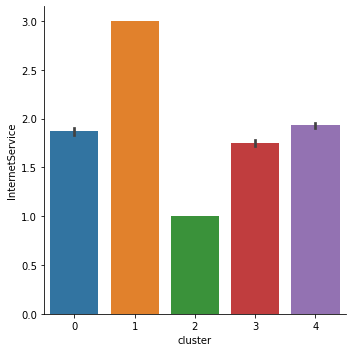

In [48]:
g = sns.catplot(x="cluster",
                y="InternetService",
                kind="bar", 
                data=df2)

## Phone Service Vs Cluster of churning Customer

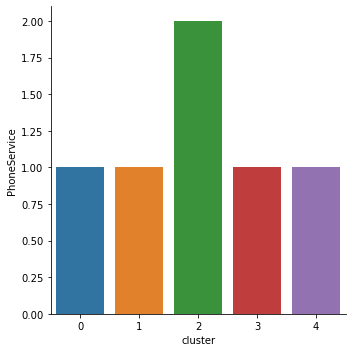

In [49]:
g = sns.catplot(x="cluster",
                y="PhoneService",
                kind="bar", 
                data=df2)

## Payment Method Vs Cluster of churning Customer

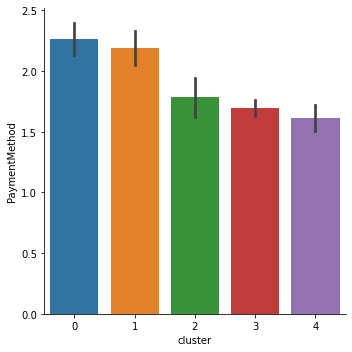

In [50]:
g = sns.catplot(x="cluster",
                y="PaymentMethod",
                kind="bar", 
                data=df2)

## Multiple Line Vs Cluster of churning Customer

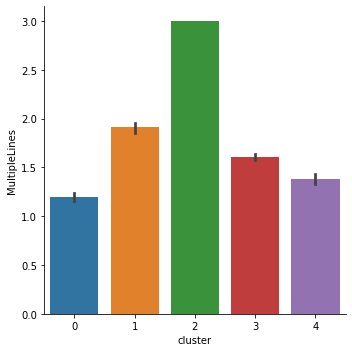

In [52]:
g = sns.catplot(x="cluster",
                y="MultipleLines",
                kind="bar", 
                data=df2)